In [ ]:
# Due data 30th April, Friday
# Load libs
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier 
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# load data for train split instead
train_FNC = pd.read_csv(  '../../../../mlsp-2014-mri/Train/train_FNC.csv', delimiter=',')
train_SBM = pd.read_csv(  '../../../../mlsp-2014-mri/Train/train_SBM.csv', delimiter=',')
train_labels = pd.read_csv(  '../../../../mlsp-2014-mri/Train/train_labels.csv', delimiter=',')

test_FNC = pd.read_csv(  '../../../../mlsp-2014-mri/Test/test_FNC.csv', delimiter=',')
test_SBM = pd.read_csv(  '../../../../mlsp-2014-mri/Test/test_SBM.csv', delimiter=',')
print('Data load complete')

Data load complete


In [90]:
# Merge data
# Train data
data = pd.merge(train_FNC, train_SBM)
data_2 = pd.merge(data, train_labels)
data_2.to_csv('amalgamated_train_data.csv', index=False)
train_data = pd.read_csv('../../../../mlsp-2014-mri/assign_data/amalgamated_train_data.csv', delimiter=',')

# Test data
test_data = pd.merge(test_FNC, test_SBM)
test_data.to_csv('amalgamated_test_data.csv', index=False)
print('done')
# had to remove index in R because python apparently cant do that 
# R code below 
# data = read.csv("mlsp-2014-mri/amalgamated_train_data.csv", as.is=T, header=T, sep=",")
# write.csv(data[,-1], 'mlsp-2014-mri/assign_data/amalgamated_train_data.csv', row.names = F)

# data = read.csv("mlsp-2014-mri/amalgamated_test_data.csv", as.is=T, header=T, sep=",")
# write.csv(data[,-1], 'mlsp-2014-mri/assign_data/amalgamated_test_data.csv', row.names = F)

done


In [ ]:
#####################
# for testing start #
#####################

# load data
train_data = pd.read_csv('../../../../mlsp-2014-mri/assign_data/amalgamated_train_data.csv', delimiter=',', index_col=False)
test_data = pd.read_csv('../../../../mlsp-2014-mri/assign_data/amalgamated_test_data.csv', delimiter=',', index_col=False)
# convert test data to df from numpy array
test_data_df = pd.DataFrame(test_data)

# Prepare values for training data
labels = train_data.pop('Class').values
data = train_data.values

# load data for submition
submition_csv = pd.read_csv(  '../../../../mlsp-2014-mri/submission_example.csv', delimiter=',')

print('Data load complete')

In [10]:
##################################
# SVM Model - Kaggle best 79.5 % #
##################################

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=109) 
# 70% training and 30% test
# Create a svm Classifier
clf = svm.SVC(kernel='sigmoid') # Best Kernel was Sigmoid 

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

####################
# Model Evaluation #
####################
# read again, refresh memory https://www.jeremyjordan.me/evaluating-a-machine-learning-model/
# read up on random_state=109 why, without it model is bad 
# https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

print ('Model Evaluation')
# Model Accuracy: how often is the classifier correct
print("Model Accuracy:", round(metrics.accuracy_score(y_test, y_pred), 3))

# Model Precision: what percentage of positive tuples are labeled as such
print("Model Precision:", round(metrics.precision_score(y_test, y_pred), 3))

# Model Recall: what percentage of positive tuples are labelled as such
print("Model Recall:", round(metrics.recall_score(y_test, y_pred), 3))

# print("Confusion Matrix :", confusion_matrix(y_test,y_pred))
# print("Classification Report :", classification_report(y_test,y_pred))

##############################
# Testing model on test data #
##############################

X_test, y_test = train_test_split(test_data_df, test_size=1, random_state=109) # 70% training and 30% testprint("after split check", len(X_test),  len(y_test))
y_pred = clf.predict(test_data_df)
# probability preformed really bad, so i think 0 or 1 is a better 
# y_predict_proba = clf.predict_proba(test_data_df)
submition_csv['Probability'] = y_pred
submition_csv
submition_csv.to_csv('test_submition.csv', index=False)


Model Evaluation
Model Accuracy: 0.577
Model Precision: 1.0
Model Recall: 0.083


In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=109) 
# 70% training and 30% test

#Predict the response for test dataset
y_pred = clf.predict(X_test)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)



# Fitting logistic regression to the training set
Classifier = LogisticRegression(random_state=0)
Classifier.fit(x_train, y_train)

In [5]:
###########################################
# Random Forest Model - Kaggle best 70.2% #
###########################################

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=100) # 70% training and 30% test

#Create a Gaussian Classifier
clf=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
#(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

####################
# Model Evaluation #
####################
# read again, refresh memory https://www.jeremyjordan.me/evaluating-a-machine-learning-model/
# read up on random_state=109 why, without it model is bad 
# https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

print ('Model Evaluation')

# Model Accuracy: how often is the classifier correct
print("Model Accuracy:", round(metrics.accuracy_score(y_test, y_pred), 3))

# Model Precision: what percentage of positive tuples are labeled as such
print("Model Precision:", round(metrics.precision_score(y_test, y_pred), 3))

# Model Recall: what percentage of positive tuples are labelled as such
print("Model Recall:", round(metrics.recall_score(y_test, y_pred), 3))


##############################
# Testing model on test data #
##############################

X_test, y_test = train_test_split(test_data_df, test_size=1, random_state=114) # 70% training and 30% testprint("after split check", len(X_test),  len(y_test))
y_pred = clf.predict(test_data_df)
# probability preformed really bad, so i think 0 or 1 is a better 
# y_predict_proba = clf.predict_proba(test_data_df)
submition_csv['Probability'] = y_pred
submition_csv
submition_csv.to_csv('test_submition.csv', index=False)

Model Evaluation
Model Accuracy: 0.769
Model Precision: 0.857
Model Recall: 0.545


In [100]:
# get values, returns a series object with index and keys fields, more can be found 
# here https://pandas.pydata.org/docs/reference/api/pandas.Series.keys.html

feature_imp = pd.Series(clf.feature_importances_,index=train_data.columns).sort_values(ascending=False)

# keep top 10 values
top_ten_features = feature_imp.nlargest(10, keep='all')
top_ten_features
# print(top_ten_features.keys())

SBM_map67    0.021253
FNC40        0.018990
SBM_map61    0.017347
FNC226       0.015771
FNC295       0.012758
SBM_map36    0.011725
SBM_map75    0.011547
FNC333       0.009480
FNC209       0.009442
FNC229       0.009197
dtype: float64

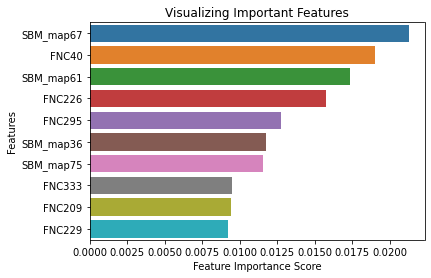

In [82]:
%matplotlib inline
# Creating a bar plot
sns.barplot(x=top_ten_features, y=top_ten_features.index)
# labels
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
# the legend works but takes up space and isnt needed
# plt.legend(top_ten_features.keys())
plt.show()

# Im not sure what these features are specifically 

In [189]:
###########################################
# Random Forest Model - FIX LATER DONE FOR NOW #
###########################################

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(top_ten_data, top_ten_labels, test_size=0.3, random_state=100) # 70% training and 30% test

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

####################
# Model Evaluation #
####################
print ('Model Evaluation')

# Model Accuracy: how often is the classifier correct
print("Model Accuracy:", round(metrics.accuracy_score(y_test, y_pred), 3))


##############################
# Testing model on test data #
##############################

X_test, y_test = train_test_split(test_data_df[top_ten_labels].transpose(), test_size=0.3, random_state=114) # 70% training and 30% testprint("after split check", len(X_test),  len(y_test))
y_pred = clf.predict(X_test)
# probability preformed really bad, so i think 0 or 1 is a better 
# y_predict_proba = clf.predict_proba(test_data_df)
submition_csv['Probability'] = y_pred
submition_csv
submition_csv.to_csv('test_submition.csv', index=False)

ValueError: Number of features of the model must match the input. Model n_features is 86 and input n_features is 119748 

In [159]:
top_ten_labels = train_data[top_ten_features.keys()].keys()
top_ten_data = train_data[top_ten_features.keys()].values.transpose()

In [184]:
print(top_ten_data.shape)
print(top_ten_labels.shape)
print(test_data_df.shape)
print(test_data_df[top_ten_labels].transpose().shape)
test_data_df[top_ten_labels]

(10, 86)
(10,)
(119748, 410)
(10, 119748)


,SBM_map67,FNC40,SBM_map61,FNC226,FNC295,SBM_map36,SBM_map75,FNC333,FNC209,FNC229
0,1.145440,0.317406,1.123770,-0.043040,-0.334534,-2.011786,0.192076,0.656662,0.560325,0.552640
1,-0.191733,0.699394,1.397832,0.762970,0.492634,0.185261,0.174160,0.180000,0.495973,0.308077
2,-0.193911,-0.050571,1.906989,-0.311307,-0.164870,-0.123830,-0.476647,0.471952,0.517241,0.642762
3,1.154107,0.161171,-1.997087,0.661212,-0.153759,0.167515,2.790871,-0.060530,0.123204,0.029668
4,-1.230440,0.446376,1.578984,-0.375362,0.117024,2.410666,-1.544345,0.385716,-0.221459,-0.127928
...,...,...,...,...,...,...,...,...,...,...
119743,2.479249,0.733727,1.079632,-0.716205,0.289068,2.027816,0.548342,0.335790,-0.089250,0.122477
119744,0.062809,0.504592,0.192909,0.160621,-0.109281,-0.047793,-0.690686,0.141910,0.266495,0.538134
119745,0.759654,0.192104,0.430025,0.180379,0.004635,1.595677,1.607317,0.568533,0.115795,0.343420
119746,0.183669,-0.124268,-2.599313,0.594323,-0.030559,1.427952,-1.313079,0.153693,0.121004,0.241680


In [214]:
###########################################
# Neural Network Model -  #
###########################################

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size= 0.3, random_state=2)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPClassifier(random_state=0, max_iter=100)

mlp.fit(X_train_scaled, y_train)
y_pred = mlp.predict(scaler.transform(test_data_df))
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test))) 
y_pred

submition_csv['Probability'] = y_pred
submition_csv
submition_csv.to_csv('test_submition.csv', index=False)

Accuracy on training set: 1.000
Accuracy on test set: 0.769


In [216]:
#################################
# LinearDiscriminantAnalysis Model - Kaggle best 77.2% #
#################################
# look up https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=109) # 70% training and 30% test
#Create a svm Classifier
clf = LinearDiscriminantAnalysis()

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

####################
# Model Evaluation #
####################
# read again, refresh memory https://www.jeremyjordan.me/evaluating-a-machine-learning-model/
# read up on random_state=109 why, without it model is bad 
# https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

print ('Model Evaluation')

# Model Accuracy: how often is the classifier correct
print("Model Accuracy:", round(metrics.accuracy_score(y_test, y_pred), 3))

# Model Precision: what percentage of positive tuples are labeled as such
print("Model Precision:", round(metrics.precision_score(y_test, y_pred), 3))

# Model Recall: what percentage of positive tuples are labelled as such
print("Model Recall:", round(metrics.recall_score(y_test, y_pred), 3))


##############################
# Testing model on test data #
##############################

X_test, y_test = train_test_split(test_data_df, test_size=1, random_state=109) # 70% training and 30% testprint("after split check", len(X_test),  len(y_test))
y_pred = clf.predict(test_data_df)
# probability preformed really bad, so i think 0 or 1 is a better 
# y_predict_proba = clf.predict_proba(test_data_df)
submition_csv['Probability'] = y_pred
submition_csv
submition_csv.to_csv('test_submition.csv', index=False)


Model Evaluation
Model Accuracy: 0.692
Model Precision: 0.625
Model Recall: 0.833
